In [ ]:
!pip install transformers

# Natural Language Processing (Transformers and the Hugging Face)

## Table of Content 

### 1: Introduction to Natural Language Processing

* Basics of natural language processing
* Text preprocessing techniques
* Overview of traditional NLP techniques (Bag of Words, TF-IDF, Word2Vec, GloVe)
* Overview of RNNs and LSTMs


### 2 Transformer Models

* Introduction to the Transformer architecture
* Self-attention mechanism
* Multi-head attention
* Positional encoding
* Encoder-decoder structure
* BERT, GPT, and other popular Transformer models


### 3 Transfomer Applications
* encoder-only,
* decoder-only,
* encoder-decoder (sequence-to-sequence) architectures.


### 4: Introduction to Hugging Face

* Overview of the Hugging Face ecosystem
* Installing the transformers library
* Pipeline
 
 
### 5 Pipeline tasks 
* Text classification:
* Question answering
* Named entity recognition:


###  Basics of natural language processing

Natural Language Processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans using natural language. The goal is to enable computers to understand, interpret, and generate human language in a way that is both meaningful and useful. NLP techniques are used to process, analyze, and generate insights from text data.


NLP tasks include text classification, sentiment analysis, machine translation, named entity recognition, text summarization, and more.

### Text preprocessing techniques


Text preprocessing is a crucial step in NLP that involves cleaning and transforming raw text data into a structured format that can be easily understood by algorithms. Common preprocessing techniques include:

* **Lowercasing**: Converting text to lowercase to reduce the dimensionality of the data.

* **Tokenization**: Splitting text into words, phrases, or subwords (tokens) to enable further analysis.

* **Stopword removal**: Removing common words (e.g., "the", "and", "is") that don't carry much meaning.

* **Stemming and lemmatization**: Reducing words to their base form to decrease data sparsity and improve model generalization.

* **Removing special characters and numbers**: Cleaning the text by removing unwanted characters and digits.

* **Removing HTML tags and URLs**: Cleaning web-based text data.

* **Spell checking and correction** : Identifying and correcting spelling errors in the text.


In [11]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup


nltk.download('omw-1.4')

# Sample text
text = "<html><body><h1>This is a sample text! It contains <a href='https://example.com'>links</a> and special characters, like 123 and #.</h1></body></html>"

# Lowercasing
text = text.lower()

# Removing HTML tags
text = BeautifulSoup(text, "html.parser").get_text()

# Removing URLs
text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

# Removing special characters and numbers
text = re.sub(r"\W+|_|\d+", " ", text)

# Tokenization
tokens = word_tokenize(text)

# Stopword removal
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
tokens = [word for word in tokens if word not in stop_words]

# Stemming
stemmer = PorterStemmer()
tokens_stemmed = [stemmer.stem(word) for word in tokens]

# Lemmatization
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()
tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens]

print("Original Tokens:", tokens)
print("Stemmed Tokens:", tokens_stemmed)
print("Lemmatized Tokens:", tokens_lemmatized)


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original Tokens: ['sample', 'text', 'contains', 'links', 'special', 'characters', 'like']
Stemmed Tokens: ['sampl', 'text', 'contain', 'link', 'special', 'charact', 'like']
Lemmatized Tokens: ['sample', 'text', 'contains', 'link', 'special', 'character', 'like']


### Overview of traditional NLP techniques

Before deep learning revolutionized NLP, several traditional techniques were used to represent and process text data. Some of these techniques include:

#### Bag of Words (BoW)

Represents text as a "bag" (unordered set) of words, disregarding grammar and word order but maintaining the frequency of words.
Text is converted into a numerical format by counting the occurrence of each word in the document.
Term Frequency-Inverse Document Frequency (TF-IDF)

A numerical statistic that reflects the importance of a word in a document relative to all other documents in a corpus.
Takes into account the frequency of a word in a document (term frequency) and the rarity of the word across all documents (inverse document frequency).



In [12]:
from sklearn.feature_extraction.text import CountVectorizer

documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

print("Vocabulary:", vectorizer.get_feature_names())
print("Bag of Words Matrix:\n", X.toarray())


Vocabulary: ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
Bag of Words Matrix:
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


C:\Users\John\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


####  Word2Vec

A popular word embedding technique that maps words to dense vectors of fixed size.
Word2Vec learns continuous vector representations by training shallow neural networks to predict a word's context or a word given its context.
Captures the semantic meaning and relationships between words.




In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

print("Vocabulary:", vectorizer.get_feature_names())
print("TF-IDF Matrix:\n", X.toarray())

Vocabulary: ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
TF-IDF Matrix:
 [[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


#### GloVe (Global Vectors for Word Representation)

Another word embedding technique that captures the global co-occurrence information of words in a corpus.
GloVe is trained on the aggregated global word-word co-occurrence matrix, focusing on capturing the global context of words rather than the local context, as in Word2Vec.

In [ ]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Convert GloVe vectors to Word2Vec format
glove_input_file = "glove.6B.50d.txt"  # Download this file from the GloVe website  https://www.kaggle.com/datasets/watts2/glove6b50dtxt
word2vec_output_file = "glove.6B.50d.word2vec.txt"
glove2word2vec(glove_input_file, word2vec_output_file)

# Load the converted GloVe model
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Word vector for 'example'
print("Word vector for 'example':", model["example"])




### 4  Overview of RNNs and LSTMs

#### Recurrent Neural Networks (RNNs) 
are a class of neural networks designed to process sequential data. RNNs maintain a hidden state that can store information from previous time steps, allowing them to capture dependencies between elements in a sequence. However, RNNs suffer from the vanishing gradient problem, which makes learning long-range dependencies difficult.

#### Long Short-Term Memory (LSTM) networks 
are a type of RNN that addresses the vanishing gradient problem by introducing memory cells and gating mechanisms. LSTMs can learn long-range dependencies and have been successfully used in many NLP tasks, such as language modeling, machine translation, and text generation.


* **While RNNs and LSTMs have played a significant role in the development of NLP**, more recent advances have been driven by **Transformer models**, which offer **improved performance and scalability**.

## 2 Transformer Models

### Introduction to the Transformer architecture

The Transformer architecture, introduced by Vaswani et al. (2017) in the paper "Attention is All You Need," is a new paradigm for sequence-to-sequence tasks, such as machine translation. Unlike RNNs and LSTMs, Transformers rely entirely on self-attention mechanisms to process input sequences in parallel rather than sequentially, leading to significant improvements in efficiency and performance.



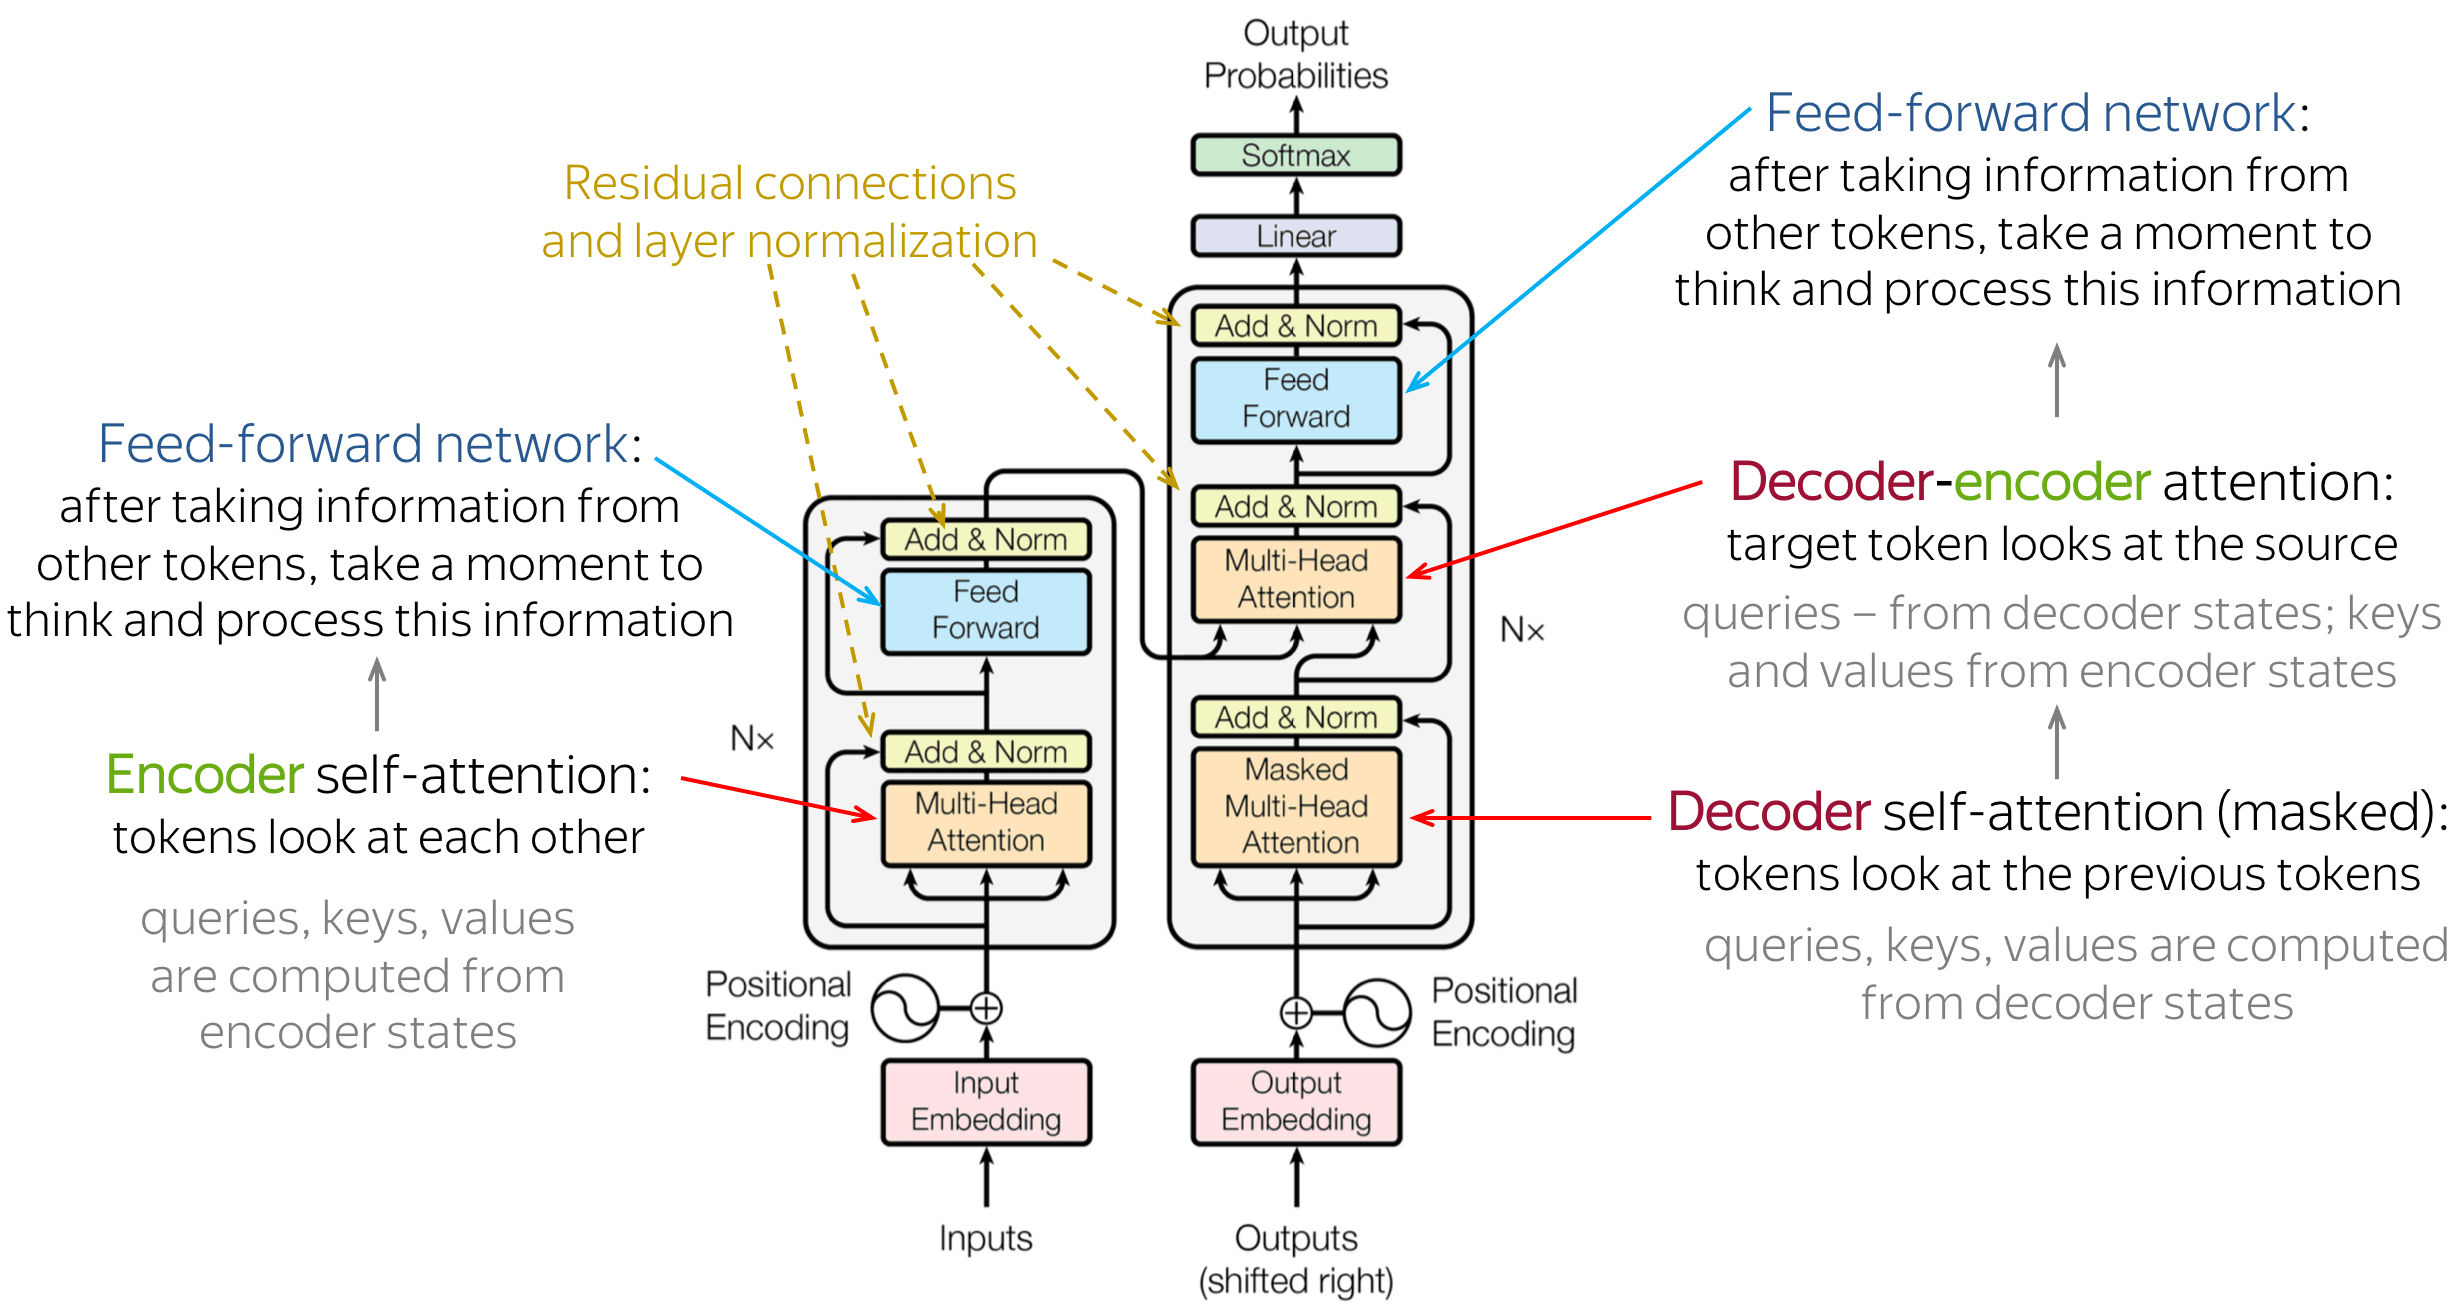

In [14]:
from IPython.display import Image
Image(filename="data/images/trans.png")

### Self-attention mechanism

The self-attention mechanism allows the Transformer model to weigh the importance of each word in a sequence relative to other words in the same sequence. It computes a score for each word by taking the dot product of its query and key vectors, followed by a softmax activation to normalize the scores. The resulting attention weights are then multiplied by the value vectors, creating a context vector that captures the relationships between words in the sequence.

#### simple explanation

Have you ever played a game where you have to guess a word, and your friends give you clues? For example, they might say "It's a food," or "It's green," or "It's round." These clues help you to narrow down the possibilities and guess the word.



The self-attention mechanism is kind of like that. It's a way for a computer to understand the meaning of a sentence by looking at the relationships between the words in the sentence. For example, if you see the sentence "The cat sat on the mat," the self-attention mechanism can tell that the words "cat" and "mat" are related, because they are both nouns that refer to objects. The self-attention mechanism can also tell that the word "sat" is related to the words "cat" and "mat," because it is a verb that describes what the cat is doing.



The self-attention mechanism is a powerful tool that can be used to understand the meaning of text. It is used in many different natural language processing tasks, such as machine translation, text summarization, and question answering

### Multi-head attention

Multi-head attention is an extension of self-attention that allows the model to capture different types of relationships between words in the input sequence. The Transformer splits the input embeddings into multiple "heads" and applies self-attention to each head independently. The outputs from all heads are then concatenated and transformed by a linear layer to produce the final context vector.

#### simple explanation 
Multi-head attention is a way to look at the relationships between words in a sentence in a more comprehensive way. It does this by splitting the input embeddings into multiple "heads" and applying self-attention to each head independently. The outputs from all heads are then concatenated and transformed by a linear layer to produce the final context vector.

The benefit of using multi-head attention is that it allows the model to capture different types of relationships between words in the input sequence. For example, one head might focus on the semantic relationships between words, while another head might focus on the syntactic relationships between words. This allows the model to have a better understanding of the meaning of the sentence.

Here is an analogy that might help you understand multi-head attention. Imagine you are trying to understand a picture. You could use one eye to look at the picture, but you would not be able to see very much. You would need to use both eyes to get a better understanding of the picture. Multi-head attention is like using two eyes to look at a sentence. It allows the model to see the sentence from different perspectives, which helps it to understand the meaning of the sentence more accurately.

### Positional encoding

Since the Transformer architecture does not inherently capture the position of words in a sequence, positional encoding is used to add information about the word's position. Positional encoding vectors are added to the input word embeddings, allowing the model to learn the relative position of words in the input sequence.

#### simple explanation 

Imagine you are trying to understand a sentence like "The cat sat on the mat." You know that "The" is the first word, "cat" is the second word, "sat" is the third word, and "mat" is the fourth word. This information helps you to understand the meaning of the sentence.



However, the Transformer architecture does not inherently capture the position of words in a sequence. This means that the model would not be able to tell the difference between the sentences "The cat sat on the mat" and "Mat sat on the cat."



Positional encoding is a way to add information about the position of words in a sequence to the input word embeddings. This allows the model to learn the relative position of words in the input sequence.

### Encoder-decoder structure

The Transformer model consists of an encoder and a decoder, both made up of multiple layers.

* The encoder takes the input sequence and processes it using self-attention and feed-forward layers, generating a context vector for each word in the sequence. 


* The decoder then generates the output sequence by applying self-attention, encoder-decoder attention, and feed-forward layers in an autoregressive manner.

#### simple explanation 

Here's an analogy I can think of to explain Encoder-Decoder structure.

* Imagine you're a detective trying to solve a crime. You have a bunch of clues, like a witness statement, a crime scene photo, and a fingerprint. You need to put all of these clues together to figure out what happened.



* The Transformer model is like you, the detective. The encoder is like the witness statement, the crime scene photo, and the fingerprint. The decoder is like your brain, trying to put all of the clues together to figure out what happened.



* The encoder takes the clues and processes them using self-attention and feed-forward layers. This is like you, the detective, looking at all of the clues and trying to figure out what they mean.



* The decoder then generates the output sequence by applying self-attention, encoder-decoder attention, and feed-forward layers in an autoregressive manner. This is like you, the detective, putting all of the clues together to figure out what happened.



The Transformer model is a powerful tool that can be used to solve a variety of natural language processing tasks, like machine translation, text summarization, and question answering. It's able to do this by looking at the relationships between words in a sequence and using this information to generate the output sequence.

### BERT, GPT, and other popular Transformer models

* **BERT** (Bidirectional Encoder Representations from Transformers) is a pre-trained Transformer model designed for various NLP tasks, such as text classification and named entity recognition. BERT is trained on large-scale masked language modeling and next-sentence prediction tasks, allowing it to learn deep bidirectional representations of words in a sequence.



* **GPT** (Generative Pre-trained Transformer) is another popular pre-trained Transformer model that focuses on language modeling and text generation tasks. GPT is trained on a large-scale unidirectional language modeling task, making it well-suited for tasks that require text generation or completion.



Other Transformer models include RoBERTa, DistilBERT, T5, and ELECTRA, each with specific modifications and improvements over the original Transformer architecture to enhance performance and efficiency in various NLP tasks.

##### How a unidirectional and bidirectional encoder would process the sentence "The cat sat on the mat."

* Unidirectional encoder (GPT): The unidirectional encoder would start at the beginning of the sentence and process each word in order. When it processed the word "the," it would only be able to look at the words that came before it. It would not be able to look at the word "mat" that came after it.

    
* Bidirectional encoder(BERT): The bidirectional encoder would start at the beginning of the sentence and process each word in order. However, when it processed the word "the," it would be able to look at both the words that came before it and the words that came after it. This would allow it to understand the meaning of the word "the" in the context of the entire sentence.

## 3 Transfomer Applications 

Transformers are a powerful and versatile class of neural network architectures that have revolutionized the field of natural language processing (NLP). 

* These models leverage the self-attention mechanism to effectively handle input sequences and have shown remarkable performance across a wide range of tasks. 



* The flexibility and efficiency of transformer models have led to their widespread adoption in various applications, including text classification, machine translation, text summarization, and conversational AI, among others. 



* In this section, we will discuss the different applications of transformer models, focusing on the roles and use cases of 
  * encoder-only,
  * decoder-only, 
  * encoder-decoder (sequence-to-sequence) architectures.

### Encoder-only architectures 

Encoder-only architectures are used in various natural language processing (NLP) tasks that involve extracting information from a given text or generating fixed-size representations of input sequences. Some of the applications of encoder-only transformers include:

#### Text classification: 
In tasks like sentiment analysis, topic classification, or spam detection, the encoder processes the input text and generates a continuous representation, which can be fed into a classification layer to predict the class label.

#### Named Entity Recognition (NER): 
The encoder can be used to process input text and generate token-level representations, which can then be classified into various entity types, such as person names, organizations, locations, etc.

#### Question-Answering (QA): 
In this task, the encoder processes both the context (e.g., a passage or document) and a question to generate contextual representations. These representations are then used to predict the start and end positions of the answer in the context.

#### Embedding generation: 
Encoder-only architectures can be used to generate fixed-size embeddings or representations for a given text, which can then be used for tasks like document clustering, similarity search, or information retrieval.

#### Masked Language Modeling: 
In this pre-training task, the encoder is trained to predict masked tokens in a given input sequence. This objective helps the model learn contextual representations that capture the meaning and structure of the language.


* **BERT (Bidirectional Encoder Representations from Transformers)** is a well-known example of an encoder-only architecture. It has been pre-trained on large-scale unsupervised data and can be fine-tuned for a wide range of NLP tasks.

### Decoder-only architectures

Decoder-only architectures are used in natural language processing (NLP) tasks that involve generating text or sequences based on given input or context. Some of the applications of decoder-only transformers include:

#### Language Modeling:
In this task, the decoder is trained to predict the next word or token in a sequence, given the previous words or tokens. This helps the model learn the structure, grammar, and semantics of the language.

#### Text Generation: 
Decoder-only architectures can be used to generate text based on a given prompt or input sequence. They can generate completions, continuations, or creative variations of the input text.

#### Text Summarization:
The decoder can be used to generate abstractive summaries of long documents or articles by capturing the main ideas and generating a shorter, coherent piece of text.

#### Conversational AI and Chatbots: 
Decoder-only architectures can be used to create models that generate context-aware responses in a conversation or a chatbot based on the user's input and the conversation history.

#### Conditional Generation: 
The decoder can be used to generate text based on certain conditions, such as generating text in a specific style, mood, or adhering to a given constraint.

* **GPT (Generative Pre-trained Transformer)** is a popular example of a decoder-only architecture. It has been pre-trained on large-scale unsupervised data and can be fine-tuned for various text generation tasks or used in zero-shot settings.

It's important to note that some tasks, like machine translation, require the full encoder-decoder architecture, where the encoder processes the input text in the source language, and the decoder generates the translated text in the target language. In this case, both the encoder and decoder work together to transfer information between the two languages.

### Sequence-to-sequence (seq2seq) models

Sequence-to-sequence (seq2seq) models, which utilize both encoder and decoder components, are designed for tasks that involve mapping input sequences to output sequences. Some of the key applications of seq2seq models with encoder-decoder architectures include:

#### Machine Translation: 
Seq2seq models are widely used for translating text from one language to another. The encoder processes the input text in the source language and generates a continuous representation, while the decoder generates the translated text in the target language based on this representation.

#### Text Summarization: 
In abstractive text summarization, the encoder processes the input document or article and generates a continuous representation that captures the key ideas. The decoder then generates a coherent summary based on this representation.

#### Dialogue Systems and Chatbots: 
For multi-turn conversational agents, the encoder processes the conversation history, and the decoder generates context-aware responses based on this representation.

####  Paraphrasing: 
Seq2seq models can be used to rephrase sentences or text while preserving the original meaning. The encoder processes the input text, and the decoder generates a paraphrased version based on the continuous representation.

#### Code Generation: 
Seq2seq models can be employed to generate code snippets or complete programs based on natural language descriptions. The encoder processes the input description, and the decoder generates the corresponding code based on the learned representation.

#### Image Captioning: 
Seq2seq models can be used in multimodal tasks, such as generating textual descriptions of images. In this case, a convolutional neural network (CNN) is used to extract features from the image, which are then passed to the encoder-decoder architecture to generate captions.

#### Speech Recognition: 
Seq2seq models can be employed for tasks like automatic speech recognition (ASR), where the encoder processes audio features, and the decoder generates the corresponding text transcription.

#### Grammar Correction:
Seq2seq models can be used to correct grammatical errors in text. The encoder processes the input text with errors, and the decoder generates a corrected version based on the learned representation.

Seq2seq models have shown great success in a variety of NLP tasks, and the development of the transformer architecture has further improved their performance and efficiency.

## 4 Getting Started with Hugging Face


### Overview of the Hugging Face ecosystem

Hugging Face is an AI research organization that has created an open-source ecosystem for Natural Language Processing (NLP) and Natural Language Understanding (NLU) tasks. Their ecosystem includes the transformers library, which provides easy access to a wide range of pre-trained transformer models, as well as tools for training, fine-tuning, and deploying these models. Some key components of the Hugging Face ecosystem are:

#### Transformers library: 
A Python library that provides state-of-the-art transformer models for NLP tasks, such as BERT, GPT, RoBERTa, and many others. It offers a simple and consistent interface for loading, training, and using these models.

#### Model Hub:
A central repository for sharing and discovering pre-trained models contributed by the Hugging Face community. The Model Hub contains thousands of models for various NLP tasks and languages, including both official models and user-submitted models.

#### Tokenizers library:
A fast and efficient library for tokenizing text in various languages. It is designed to work well with the transformers library and supports a wide range of tokenization algorithms.

#### Datasets library: 
A library that provides easy access to a large collection of datasets for NLP tasks. The datasets library makes it easy to load, preprocess, and split data for training and evaluation.

#### Hugging Face Inference API:
A cloud-based API that enables users to perform NLP tasks using pre-trained models without needing to install or run the models locally. The API provides endpoints for tasks such as text classification, named entity recognition, summarization, translation, and more.

#### Training and fine-tuning tools:
The transformers library includes tools for training and fine-tuning models on custom datasets. These tools simplify the process of adapting pre-trained models to specific tasks or domains.



Community and resources: Hugging Face has an active community of researchers, developers, and users who contribute models, datasets, and other resources. They also provide extensive documentation, tutorials, and support to help users get started with the ecosystem.

### Installing the transformers library

To install the Hugging Face transformers library, you can use pip:

### Pipeline

The Hugging Face pipeline API simplifies common NLP tasks by providing an easy-to-use interface for pre-trained models and tokenizers.


The pipeline API allows users to perform tasks such as text classification, question answering, named entity recognition, text summarization, translation, and more without worrying about tokenization, input processing, and interpreting predictions.


Pre-built pipelines come with default pre-trained models and tokenizers, which are loaded automatically. Users can also customize pipelines by providing their own pre-trained models and tokenizers.


Hugging Face pipelines can be used with both TensorFlow and PyTorch models, allowing users to switch between frameworks seamlessly.


Pipelines are designed to be flexible and can be extended for custom tasks or adapted to use different models and tokenizers, providing a powerful tool for working with state-of-the-art NLP models.

The pipeline() is the easiest and fastest way to use a pretrained model for inference (predictions)

Start by creating an instance of pipeline() and specifying a task you want to use it for. 

* In this guide, you’ll use the pipeline() for sentiment analysis as an example:

In [11]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


The pipeline() downloads and caches a default pretrained model and tokenizer for sentiment analysis. Now you can use the classifier on your target text:

In [12]:
classifier("We are very happy to show you the 🤗 Transformers library.")

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

#### You can use the pipeline() out-of-the-box for many tasks across different modalities, some of which are shown in the table below:

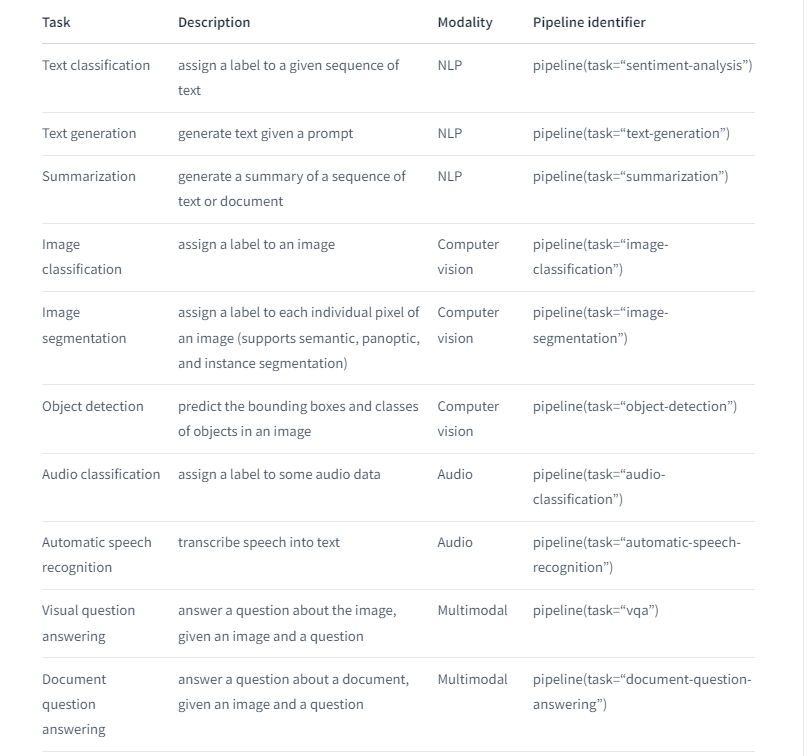

In [15]:
Image(filename="data/images/table.png")

## 5 Pipeline tasks¶

### Text classification:

In [16]:
from transformers import pipeline

question_answering = pipeline("question-answering")

context = "Hugging Face is a company based in New York City. Its headquarters are in DUMBO, Brooklyn."
question = "Where is Hugging Face's headquarters located?"

result = question_answering(question=question, context=context)
print(result)


No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.4878906309604645, 'start': 74, 'end': 89, 'answer': 'DUMBO, Brooklyn'}


### Question answering:

In [ ]:
from transformers import pipeline

question_answering = pipeline("question-answering")

context = "Hugging Face is a company based in New York City. Its headquarters are in DUMBO, Brooklyn."
question = "Where is Hugging Face's headquarters located?"

result = question_answering(question=question, context=context)
print(result)


###  Named entity recognition:

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)

text = "Hugging Face is a company based in New York City. Its headquarters are in DUMBO, Brooklyn."
result = ner(text)
print(result)


# 6 Assignment: Getting Started with Hugging Face Pipelines

In this assignment, you will practice using Hugging Face pipelines to perform various NLP tasks. You will initialize and use pipelines for sentiment analysis, question answering, and named entity recognition.



#### Task 1: Sentiment Analysis

    
* Install the transformers library if you haven't already: pip install transformers
* Import the pipeline function from the transformers library.
* Initialize a sentiment analysis pipeline.
* Use the pipeline to classify the sentiment of the following text samples:


"I love using the Hugging Face library!"


"I'm not very fond of this movie."


"The weather is terrible today."


* Print the results, including the label (positive or negative) and the confidence score.



#### Task 2: Question Answering

* Initialize a question answering pipeline.

* Use the pipeline to answer the following question given the context:

    * Context: "Hugging Face is a company based in New York City. Its headquarters are in DUMBO, Brooklyn."

    * Question: "Where is Hugging Face's headquarters located?"

* Print the result, including the answer and the confidence score.



#### Task 3: Named Entity Recognition

* Initialize a named entity recognition pipeline.

* Use the pipeline to extract entities from the following text:



"Elon Musk is the CEO of Tesla, Inc., an American electric vehicle and clean energy company based in Palo Alto, California."


* Print the result, including the entities and their types (e.g., person, organization, location).




#### Task  4: Text Summarization

* Initialize a text summarization pipeline.

* Use the pipeline to generate a summary of the following text:



"Natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans through natural language. The goal of NLP is to enable computers to understand, interpret, and generate human language in a way that is both meaningful and useful. NLP techniques are used in a wide range of applications, including text analysis, sentiment analysis, machine translation, and chatbot development. Recent advances in deep learning have led to significant improvements in the performance of NLP models, making it possible to tackle complex language tasks with greater accuracy and efficiency."


* Print the generated summary.




#### Task 5: Text Translation

* Initialize a text translation pipeline that translates from English to French.

* Use the pipeline to translate the following sentence from English to French:



"Hugging Face provides state-of-the-art NLP models and tools."

* Print the translated text.




#### Task 6: Zero-shot Classification

* Initialize a zero-shot classification pipeline.

* Use the pipeline to classify the following text into one of these categories: "sports", "technology", "politics", "entertainment", or "finance":



"Tesla unveils its latest electric vehicle, the Cybertruck."

* Print the result, including the predicted category and confidence score.

# Solution  for Tasks 1-6 

In [ ]:
from transformers import pipeline

# Task 1: Sentiment Analysis
sentiment_analysis = pipeline("sentiment-analysis")
texts = ["I love using the Hugging Face library!", "I'm not very fond of this movie.", "The weather is terrible today."]
sentiment_results = sentiment_analysis(texts)

print("Task 1: Sentiment Analysis")
for text, result in zip(texts, sentiment_results):
    print(f"{text}: {result['label']} ({result['score']:.2f})")
print()

# Task 2: Question Answering
question_answering = pipeline("question-answering")
context = "Hugging Face is a company based in New York City. Its headquarters are in DUMBO, Brooklyn."
question = "Where is Hugging Face's headquarters located?"
answer = question_answering(question=question, context=context)

print("Task 2: Question Answering")
print(f"Answer: {answer['answer']} (confidence: {answer['score']:.2f})")
print()

# Task 3: Named Entity Recognition
ner = pipeline("ner")
text = "Elon Musk is the CEO of Tesla, Inc., an American electric vehicle and clean energy company based in Palo Alto, California."
entities = ner(text)

print("Task 3: Named Entity Recognition")
for entity in entities:
    print(f"{entity['word']}: {entity['entity']} ({entity['score']:.2f})")
print()

# Task 4: Text Summarization
summarization = pipeline("summarization")
text = "Natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans through natural language. The goal of NLP is to enable computers to understand, interpret, and generate human language in a way that is both meaningful and useful. NLP techniques are used in a wide range of applications, including text analysis, sentiment analysis, machine translation, and chatbot development. Recent advances in deep learning have led to significant improvements in the performance of NLP models, making it possible to tackle complex language tasks with greater accuracy and efficiency."
summary = summarization(text)[0]['summary_text']

print("Task 4: Text Summarization")
print(summary)
print()

# Task 5: Text Translation
translation = pipeline("translation_en_to_fr")
text = "Hugging Face provides state-of-the-art NLP models and tools."
translated_text = translation(text, max_length=40)[0]['translation_text']

print("Task 5: Text Translation")
print(translated_text)
print()

# Task 6: Zero-shot Classification
zero_shot = pipeline("zero-shot-classification")
text = "Tesla unveils its latest electric vehicle, the Cybertruck."
categories = ["sports", "technology", "politics", "entertainment", "finance"]
result = zero_shot(text, candidate_labels=categories)

print("Task 6: Zero-shot Classification")
print(f"Predicted category: {result['labels'][0]} (confidence: {result['scores'][0]:.2f})")
